In [720]:
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
%matplotlib inline

In this project we are going to find an equation of linear regression line. Its' equation form is $y = a*x + b$, where $x$ is the explanatory variable and $y$ is the dependent variable. The slope of the line is $a$, and $b$ is the intercept (the value of $y$ when $x = 0$).

## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60&deg; F or warmer than 100&deg; F.

In [721]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
ground_cricket = pd.DataFrame(ground_cricket_data)

### Tasks
- Find the linear regression equation for this data.
- Chart the original data and the equation on the chart.


In [722]:
feature_cols = ['Ground Temperature']
X = ground_cricket[feature_cols]
y = ground_cricket['Chirps/Second']

linreg = LinearRegression()
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

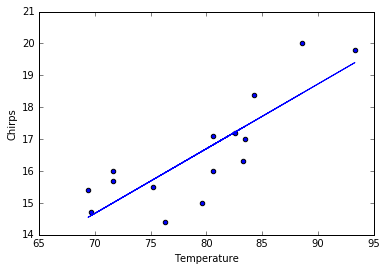

In [723]:
plt.scatter(X, y)
plt.plot(X, linreg.predict(X))
plt.xlabel('Temperature')
plt.ylabel('Chirps')
plt.show()

The linear regression equation is: $y = 0.2*x + 0.5$ 

In [724]:
print('Intercept:', linreg.intercept_)
print('Coefficient:', linreg.coef_[0])

Intercept: 0.459314645236
Coefficient: 0.202999731408


- Find the equation's  $R^2$  score (use the `.score` method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [725]:
print('R-squared Score:', linreg.score(X, y))

R-squared Score: 0.692294652915


- Extrapolate data: If the ground temperature reached 95° F, then at what approximate rate would you expect the crickets to be chirping?

In [726]:
new_x = [95]
new_x = np.array(new_x).reshape(1, -1)
print('Approximate rate of the crickets to be chirping at 95F:', linreg.predict(new_x)[0])

Approximate rate of the crickets to be chirping at 95F: 19.744289129


- Interpolate data: With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second. What was the approximate ground temperature that morning?

In [727]:
new_y = [18]
ground_temp = (new_y - linreg.intercept_) / linreg.coef_[0]
print('Approximate ground temperature at a rate of 18 chirps/sec:', ground_temp[0])

Approximate ground temperature at a rate of 18 chirps/sec: 86.4074313455


## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

- Find the linear regression equation for this data for brain weight to body weight.
- Chart the original data and the equation on the chart.


In [728]:
brain_body = pd.read_fwf("brain_body.txt")

In [729]:
feature_col = ['Brain']
X = brain_body[feature_col]
y = brain_body['Body']

linreg = LinearRegression()
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

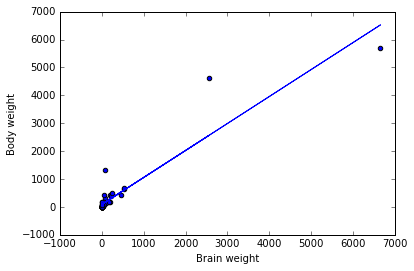

In [730]:
plt.scatter(X, y)
plt.plot(X, linreg.predict(X))
plt.xlabel('Brain weight')
plt.ylabel('Body weight')
plt.show()

The linear regression equation is: $y = x + 91$ 

In [731]:
print('Intercept:', linreg.intercept_)
print('Coefficient:', linreg.coef_[0])

Intercept: 91.0043962074
Coefficient: 0.966496367673


- Find the equation's $R^2$ score (use the `.score` method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [732]:
print('R-squared Score:', linreg.score(X, y))

R-squared Score: 0.872662084304


## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

- Find the linear regression equation for this data using columns 1-5 to column 6.


In [733]:
salary_d = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [734]:
feature_cols = ['Sex', 'Rank', 'Year', 'Degree', 'YSdeg']
X = salary_d[feature_cols]
y = salary_d['Salary']

linreg = LinearRegression()
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

The linear regression equation is: $y = 1241.8*x + 11410.1$ 

In [735]:
print('Intercept:', linreg.intercept_)
print('Coefficient:', linreg.coef_[0])
print('Score:', linreg.score(X, y))

Intercept: 11410.1465473
Coefficient: 1241.7924996
Score: 0.854718067441


- Find the selection of columns with the best $R^2$ score.
- Report whether sex is a factor in salary. Support your argument with graph(s) if appropriate.

In [736]:
combinations_list = []
for item in range(1, 6):
    combinations_list.append(itertools.combinations(feature_cols, item))

my_score = 0
for item in combinations_list:
    for columns in item:
        columns = list(columns)
        x_salary = salary_d[columns]
        salary_linreg = LinearRegression()
        salary_linreg.fit(x_salary, y)
        if my_score < salary_linreg.score(x_salary, y):
            my_score = salary_linreg.score(x_salary, y)
print(columns, '\nBest R-squared Score:', my_score)
        

['Sex', 'Rank', 'Year', 'Degree', 'YSdeg'] 
Best R-squared Score: 0.854718067441


According to the calculations it is evident that by changing the number of columns in the list of columns combinations the $R^2$ score is getting higher:
- $R^2$ score with "Years since highest degree was earned" combination: $0.7525$
- $R^2$ score with "Years since highest degree was earned" and "Highest degree" combination: $0.8436$
- $R^2$ score with "Years since highest degree was earned", "Highest degree" and "Number of years in current rank" combination: $0.8456$
- $R^2$ score with "Years since highest degree was earned", "Highest degree", "Number of years in current rank" and "Rank" combination: $0.8490$
- $R^2$ score with "Years since highest degree was earned", "Highest degree", "Number of years in current rank", "Rank" and "Sex" combination: $0.8547$

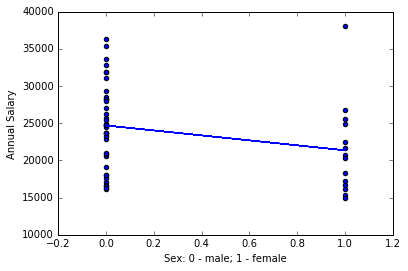

In [737]:
feature_cols = ['Sex']
X = salary_d[feature_cols]
y = salary_d['Salary']

linreg = LinearRegression()
linreg.fit(X, y)
plt.scatter(X, y)
plt.plot(X, linreg.predict(X))
plt.xlabel('Sex: 0 - male; 1 - female')
plt.ylabel('Annual Salary')
plt.show()

In [738]:
salary_d = salary_d.groupby(['Sex']).mean()
salary_d

,Rank,Year,Degree,YSdeg,Salary
Sex,,,,,
0,2.157895,8.736842,0.631579,16.657895,24696.789474
1,1.714286,4.071429,0.714286,14.642857,21357.142857


According to the provided data the average annual salary for males ("0") is higher than average annual salary for females ("1"). More than 90% of females' salary is in the range of 15000 - 27000, while males' salary is in the range of 16000 - 36000

P.S. According to The American Association of University Women (AAUW) the national pay gap for 2014 is 21% between men’s median earnings and women’s median earnings in the US. This pay gap remains the same since 2001.